# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [19]:
import pandas as pd 

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

Check for missing/null values in the three dataframes

In [20]:
### YOUR CODE HERE ###
cell_phones.isnull().sum()

geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [21]:
### YOUR CODE HERE ###
population.isnull().sum()

geo                 0
time                0
population_total    0
dtype: int64

In [22]:
### YOUR CODE HERE ###
geo_country_codes.isnull().sum()
geo_country_codes_clean = geo_country_codes.dropna()
geo_country_codes_clean.isnull().sum()

geo                       0
g77_and_oecd_countries    0
income_3groups            0
income_groups             0
is--country               0
iso3166_1_alpha2          0
iso3166_1_alpha3          0
iso3166_1_numeric         0
iso3166_2                 0
landlocked                0
latitude                  0
longitude                 0
main_religion_2008        0
country                   0
un_sdg_ldc                0
un_sdg_region             0
un_state                  0
unicef_region             0
unicode_region_subtag     0
world_4region             0
world_6region             0
dtype: int64

### Part 2 - Merge data

First, merge the `cell_phones` and `population` dataframes (with an inner merge on `geo` and `time`).

The resulting dataframe's shape should be: (8786, 4)

In [23]:
### YOUR CODE HERE ###
cell_population = pd.merge(cell_phones, population, how='inner', on=['geo','time'])
cell_population

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996967
1,afg,1965,0.0,9956318
2,afg,1970,0.0,11173654
3,afg,1975,0.0,12689164
4,afg,1976,0.0,12943093
...,...,...,...,...
8781,zwe,2014,11798652.0,13586710
8782,zwe,2015,12757410.0,13814642
8783,zwe,2016,12878926.0,14030338
8784,zwe,2017,14092104.0,14236599


Then, select only the `geo` and `country` columns from the `geo_country_codes` dataframe, and merge with your population and cell phone data.

The resulting dataframe's shape should be: (8786, 5)

In [24]:
### YOUR CODE HERE ###
cell_population_country = pd.merge(geo_country_codes[['geo', 'country']], cell_population, how='inner', on='geo')
cell_population_country

,geo,country,time,cell_phones_total,population_total
0,afg,Afghanistan,1960,0.0,8996967
1,afg,Afghanistan,1965,0.0,9956318
2,afg,Afghanistan,1970,0.0,11173654
3,afg,Afghanistan,1975,0.0,12689164
4,afg,Afghanistan,1976,0.0,12943093
...,...,...,...,...,...
8781,zwe,Zimbabwe,2014,11798652.0,13586710
8782,zwe,Zimbabwe,2015,12757410.0,13814642
8783,zwe,Zimbabwe,2016,12878926.0,14030338
8784,zwe,Zimbabwe,2017,14092104.0,14236599


### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.230448 cell phones per person in the United States in 2017.)

In [25]:
### YOUR CODE HERE ###
cell_population_country['phones_per_person'] = [cell_population_country['cell_phones_total'][i]/cell_population_country['population_total'][i] for i in range(0, len(cell_population_country['cell_phones_total']))]
print(cell_population_country.iloc[8319])
cell_population_country

geo                            usa
country              United States
time                          2017
cell_phones_total            4e+08
population_total         325084758
phones_per_person          1.23045
Name: 8319, dtype: object


,geo,country,time,cell_phones_total,population_total,phones_per_person
0,afg,Afghanistan,1960,0.0,8996967,0.000000
1,afg,Afghanistan,1965,0.0,9956318,0.000000
2,afg,Afghanistan,1970,0.0,11173654,0.000000
3,afg,Afghanistan,1975,0.0,12689164,0.000000
4,afg,Afghanistan,1976,0.0,12943093,0.000000
...,...,...,...,...,...,...
8781,zwe,Zimbabwe,2014,11798652.0,13586710,0.868397
8782,zwe,Zimbabwe,2015,12757410.0,13814642,0.923470
8783,zwe,Zimbabwe,2016,12878926.0,14030338,0.917934
8784,zwe,Zimbabwe,2017,14092104.0,14236599,0.989850


In [26]:
cell_population_country[(cell_population_country.country=='United States') & (cell_population_country.time==2017)]

,geo,country,time,cell_phones_total,population_total,phones_per_person
8319,usa,United States,2017,400000000.0,325084758,1.230448


### Stretch Goal:
Modify the geo column to make the geo codes uppercase instead of lowercase.

In [27]:
### YOUR CODE HERE ###
cell_population_country['geo'] = [i.upper() for i in cell_population_country['geo']]
cell_population_country['geo']

0       AFG
1       AFG
2       AFG
3       AFG
4       AFG
       ... 
8781    ZWE
8782    ZWE
8783    ZWE
8784    ZWE
8785    ZWE
Name: geo, Length: 8786, dtype: object

### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2018, and there are 195 unique countries represented.)

In [28]:
### YOUR CODE HERE ###
cell_population_country.describe()

,time,cell_phones_total,population_total,phones_per_person
count,8786.000000,8.786000e+03,8.786000e+03,8786.000000
mean,1994.721603,9.701331e+06,3.002185e+07,0.298025
std,14.525220,5.968296e+07,1.172833e+08,0.468332
min,1960.000000,0.000000e+00,4.377000e+03,0.000000
25%,1983.000000,0.000000e+00,1.474928e+06,0.000000
50%,1995.000000,8.500000e+03,5.816554e+06,0.002346
75%,2007.000000,2.028511e+06,1.823047e+07,0.532728
max,2018.000000,1.649302e+09,1.427648e+09,2.699755


In [29]:
### YOUR CODE HERE ###
cell_population_country.describe(exclude=[int, float])

,geo,country
count,8786,8786
unique,195,195
top,ARM,Belgium
freq,47,47


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,469,882,500 |
|    ?    |     1,168,902,277 |
|    ?    |       435,193,605 |
|    ?    |       400,000,000 |
|    ?    |       227,299,663 |


In [30]:
### YOUR CODE HERE ###
cell_population_country[cell_population_country['time']==2017][['country', 'cell_phones_total']].sort_values(by='cell_phones_total', ascending=False).head()

,country,cell_phones_total
1530,China,1.469882e+09
3674,India,1.168902e+09
3627,Indonesia,4.351936e+08
8319,United States,4.000000e+08
6783,Russia,2.272997e+08


#Explanatory visualizations:

Explain why the figure below **cannot** be graphed as a pie chart.


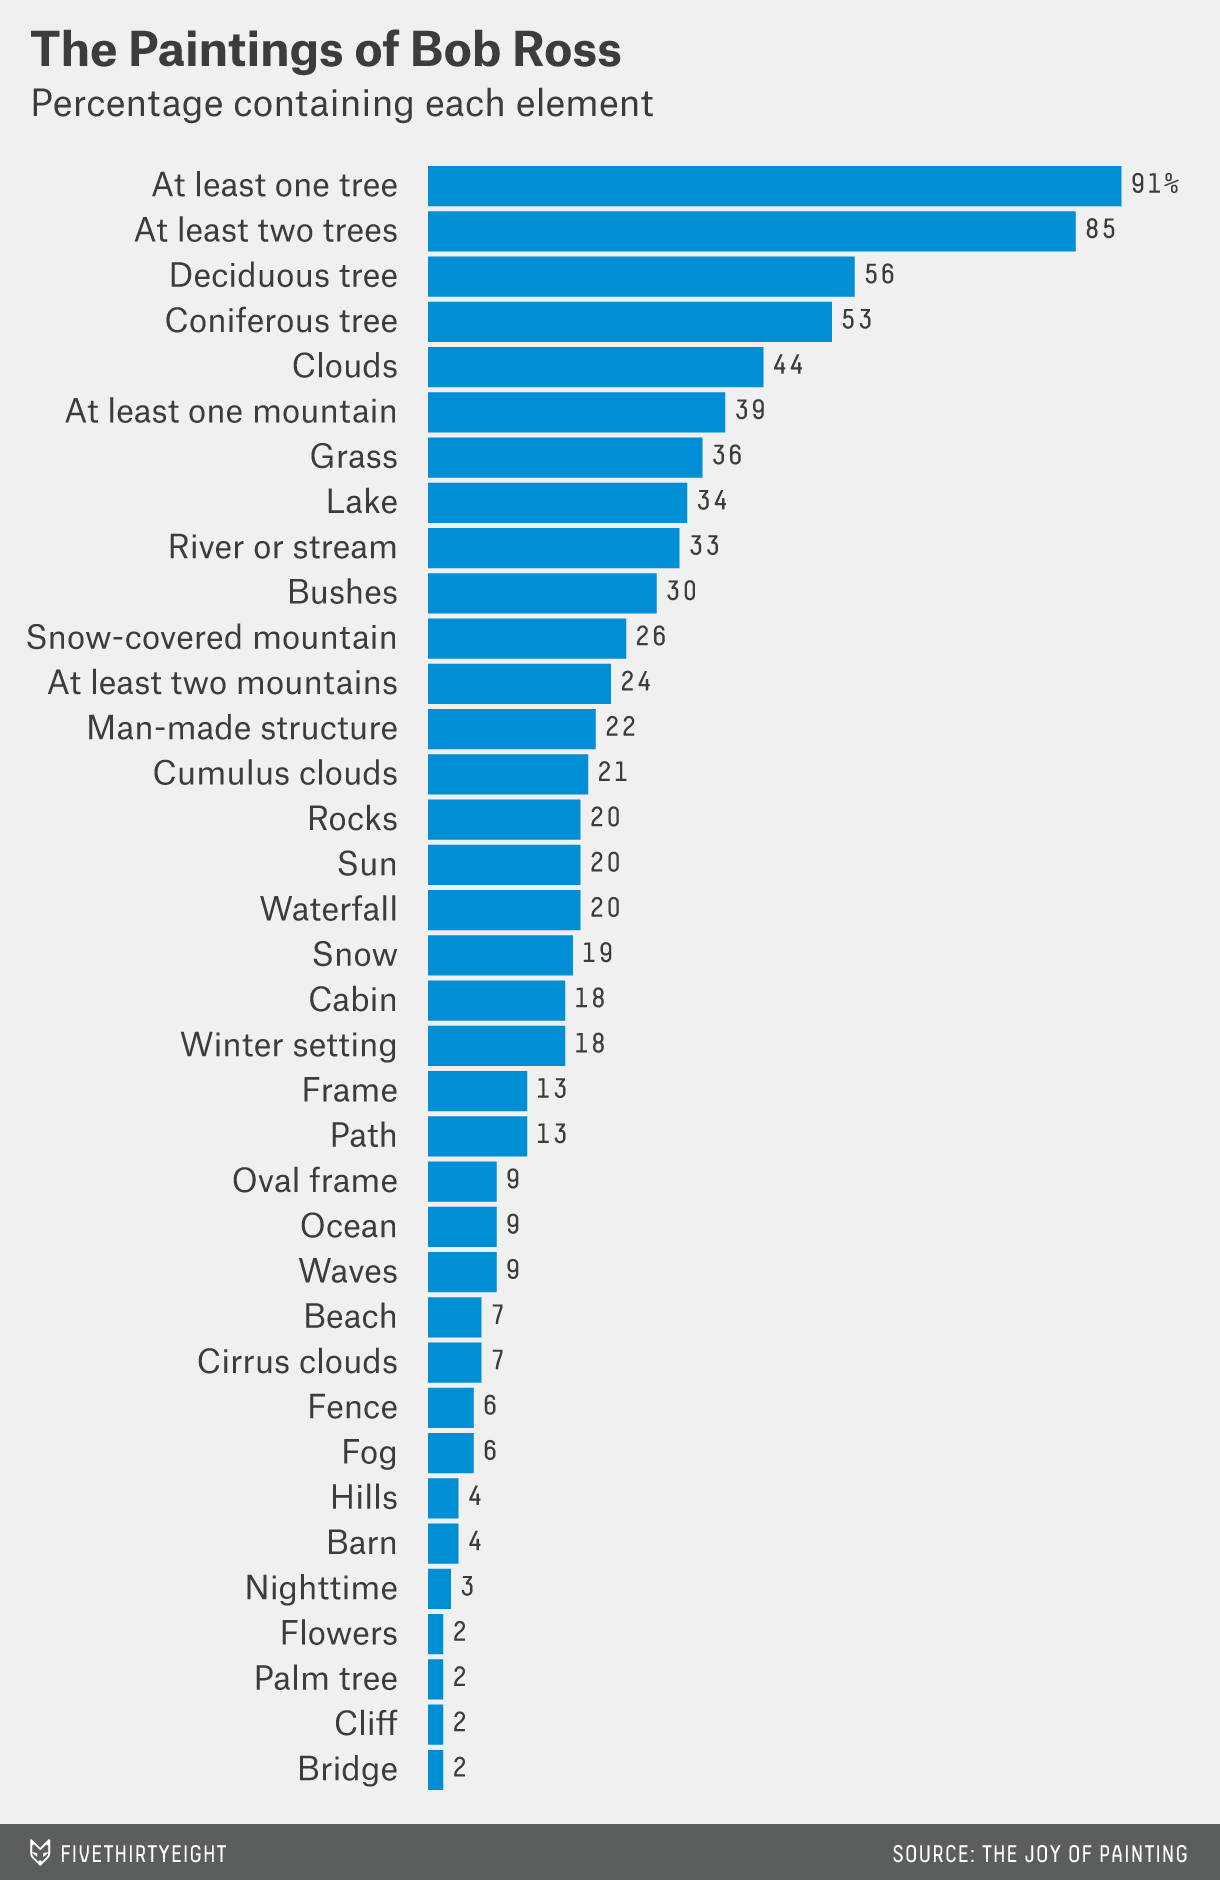

In [31]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png'
example = Image(png, width=500)
display(example)

Pie charts can only be used to represent parts of a whole. This data set represents the different features from all his paintings, which is not parts of a whole.

### Using the Titanic Data and figure, axis syntax, create a histogram of passenger age.  Describe your results in a sentence or two.

In [32]:

import pandas as pd

# Load the Titanic dataset from its URL:
Titanic = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv')

Titanic.head()


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


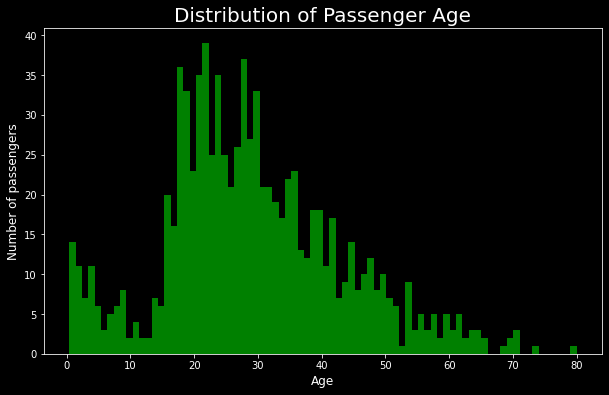

In [33]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(Titanic['Age'], bins=80, color='green')
ax.set_title('Distribution of Passenger Age', fontsize=20)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Number of passengers', fontsize=12)

plt.show()

Most of the passengers were between 15 and 30, with a steady decrease in number of passengers as age increases.